In [2]:
from peachpy import *
from peachpy.x86_64 import *
from profiler import *
from matplotlib import pyplot as plt
from peachpy.literal import Constant
import pandas as pd

In [3]:
prof= Profiler([["PERF_COUNT_HW_INSTRUCTIONS"], ["SYSTEMWIDE:RAPL_ENERGY_PKG"]])
prof.start_counters(pid=0)

In [4]:
def test_inst(inst, args):
    for inst in inst:
        real_args= args[0]
        for op2 in args:
            real_args= op2
            with Function("main", (), int32_t) as asm_function:
                inst(*real_args)
                RETURN(0)
            asm_function.finalize(abi.detect())
            #python_function = asm_function.finalize(abi.detect()).encode().load()

In [5]:
def run_inst(inst, args):
    df= []
    for inst in inst:
        real_args= args[0]
        print(inst(*real_args).name)
        for op2 in args:
            real_args= op2
            with Function("main", (), int32_t) as asm_function:
                XOR(rcx,rcx)
                MOV(rax, ~(0b1010101010101010101010101010101))
                myl= Label('loop')
                LABEL( myl )
                for _ in range(10):
                    #ADD(rax, 4)
                    inst(*real_args)
                ADD(rcx, 1)
                CMP(rcx, 9999999)
                JNE( myl )
                RETURN(0)

            python_function = asm_function.finalize(abi.detect()).encode().load()

            data= []
            for _ in range(30):
                prof.reset_events()
                prof.enable_events()
                python_function()
                prof.disable_events()
                data.append(prof.read_events())
            data= np.array(data).reshape(-1,2)
            row= [inst(*real_args).name, str(op2), data.mean(axis=0).astype(int)[1] ]
            df.append(row)
            print(op2, data.mean(axis=0).astype(int), (data.std(axis=0)/data.mean(axis=0)*100).astype(int))
    return df

In [96]:
args_t1= [[GeneralPurposeRegister64(0), GeneralPurposeRegister64(0)], 
          [GeneralPurposeRegister64(0), GeneralPurposeRegister64(1)], 
          [GeneralPurposeRegister64(0), 0], 
          [GeneralPurposeRegister64(0), int(0b1010101010101010101010101010101)]]

arts_t2= [[GeneralPurposeRegister64(0), 0], 
          [GeneralPurposeRegister64(0), int(0b10101010)]]

args_t3= [[GeneralPurposeRegister64(0)]]

args_t4= [[GeneralPurposeRegister64(0), GeneralPurposeRegister64(0), GeneralPurposeRegister64(0)]]

In [ ]:
run_inst([ADD, SUB, ADC, SBB, AND, OR, XOR, MOV, CMP], args_t1)

run_inst([ROR, ROL, SHR, SAR, SHL, SAL], args_t2)

run_inst([NOT, NEG, INC, DEC], args_t3)

In [ ]:
instr= [ADD, SUB, ADC, SBB, ADCX, ADOX, AND, OR, XOR, ANDN, NOT, NEG,
        INC, DEC, TEST, CMP, MOV, MOVZX, MOVSX, MOVSXD, MOVBE, MOVNTI,
        BT, BTS, BTR, BTC, POPCNT, BSWAP, BSF, BSR, LZCNT, TZCNT, SHR,
        SAR, SHL, SAL, SHRX, SARX, SHLX, SHRD, SHLD, ROR, ROL, RORX, RCR,
        RCL, IMUL, MUL, MULX, IDIV, DIV, LEA, PUSH, POP, POPCNT, LZCNT,
        TZCNT, BEXTR, PDEP, PEXT, BZHI, BLCFILL, BLCI, BLCIC, BLCMSK, BLCS,
        BLSFILL, BLSI, BLSIC, BLSMSK, BLSR, T1MSKC, TZMSK, CRC32, CBW, CDQ,
        CQO, CWD, CWDE, CDQE, CMOVA, CMOVNA, CMOVAE, CMOVNAE, CMOVB, CMOVNB,
        CMOVBE, CMOVNBE, CMOVC, CMOVNC, CMOVE, CMOVNE, CMOVG, CMOVNG, CMOVGE,
        CMOVNGE, CMOVL, CMOVNL, CMOVLE, CMOVNLE, CMOVO, CMOVNO, CMOVP, CMOVNP,
        CMOVS, CMOVNS, CMOVZ, CMOVNZ, CMOVPE, CMOVPO, SETA, SETNA, SETAE, SETNAE,
        SETB, SETNB, SETBE, SETNBE, SETC, SETNC, SETE, SETNE, SETG, SETNG, SETGE,
        SETNGE, SETL, SETNL, SETLE, SETNLE, SETO, SETNO, SETP, SETNP, SETS, SETNS,
        SETZ, SETNZ, SETPE, SETPO, JA, JNA, JAE, JNAE, JB, JNB, JBE, JNBE, JC, JNC,
        JE, JNE, JG, JNG, JGE, JNGE, JL, JNL, JLE, JNLE, JO, JNO, JP, JNP, JS, JNS,
        JZ, JNZ, JPE, JPO, JMP, JRCXZ, JECXZ, RET, CALL, PAUSE, NOP, INT, UD2, CPUID,
        RDTSC, RDTSCP, XGETBV, SYSCALL, STC, CLC, CMC, STD, CLD, XADD, XCHG, CMPXCHG,
        CMPXCHG8B, CMPXCHG16B, SFENCE, MFENCE, LFENCE, PREFETCHNTA, PREFETCHT0, PREFETCHT1,
        PREFETCHT2, PREFETCH, PREFETCHW, PREFETCHWT1, CLFLUSH, CLFLUSHOPT, CLWB, CLZERO]

args= [
    [GeneralPurposeRegister64(0), GeneralPurposeRegister64(0), GeneralPurposeRegister64(0)],
    [GeneralPurposeRegister64(0), GeneralPurposeRegister64(0), GeneralPurposeRegister64(1)],
    [GeneralPurposeRegister64(0), GeneralPurposeRegister64(1), GeneralPurposeRegister64(2)],
    [GeneralPurposeRegister64(0), GeneralPurposeRegister64(1), 0],
    
    [GeneralPurposeRegister64(0), GeneralPurposeRegister64(0)],
    [GeneralPurposeRegister64(0), GeneralPurposeRegister64(1)],
    [GeneralPurposeRegister64(0), 0],
    
    [GeneralPurposeRegister64(0)],
    
    [GeneralPurposeRegister8(0)],
    
    [],
    
    [GeneralPurposeRegister64(0), GeneralPurposeRegister32(0)],
    [GeneralPurposeRegister64(0), GeneralPurposeRegister16(0)],
    
    [GeneralPurposeRegister64(0), Constant.uint64(1)],
    [Constant.uint64(1), GeneralPurposeRegister64(0)],
    
    [Constant.uint64(1)],
    
    [Constant.uint64x2(1,1)],
]

suported, unsuported, ss= 0, 0, 0
for i in instr:
    wrong_arg= True
    for k in args:
        try:
            if os.path.isfile("energy_inst.csv"):
                df= pd.read_csv("energy_inst.csv")
                if any(df["inst"].str.contains(i(*k).name)): continue
            else:
                pd.DataFrame([],columns=["inst","args","energy"]).to_csv("energy_inst.csv",index=False)
                
            test_inst([i], [k])
            #print("Works", i(*k).name, k)
            suported+=1
            wrong_arg= False
            df=run_inst([i], [k])
            pd.DataFrame(df,columns=["inst","args","energy"]).to_csv("energy_inst.csv",mode="a",header=False,
                                                                     index=False)
        except Exception as e:
            if "Invalid operand types" in str(e):
                #print(e)
                pass
            if "is not supported on the target" in str(e):
                #print(e)
                wrong_arg= False
                unsuported+=1
                pass
                break
    if wrong_arg:
        #print(i, ss)
        ss+=1
print(suported, unsuported, len(instr))

In [3]:
df = pd.read_csv("energy_inst.csv")
# pd.crosstab(df["inst"],df["args"],df["energy"],aggfunc=max).plot.bar(figsize=(15,7))
# plt.legend(fontsize=14)
# plt.ylabel("Energy",fontsize=20)

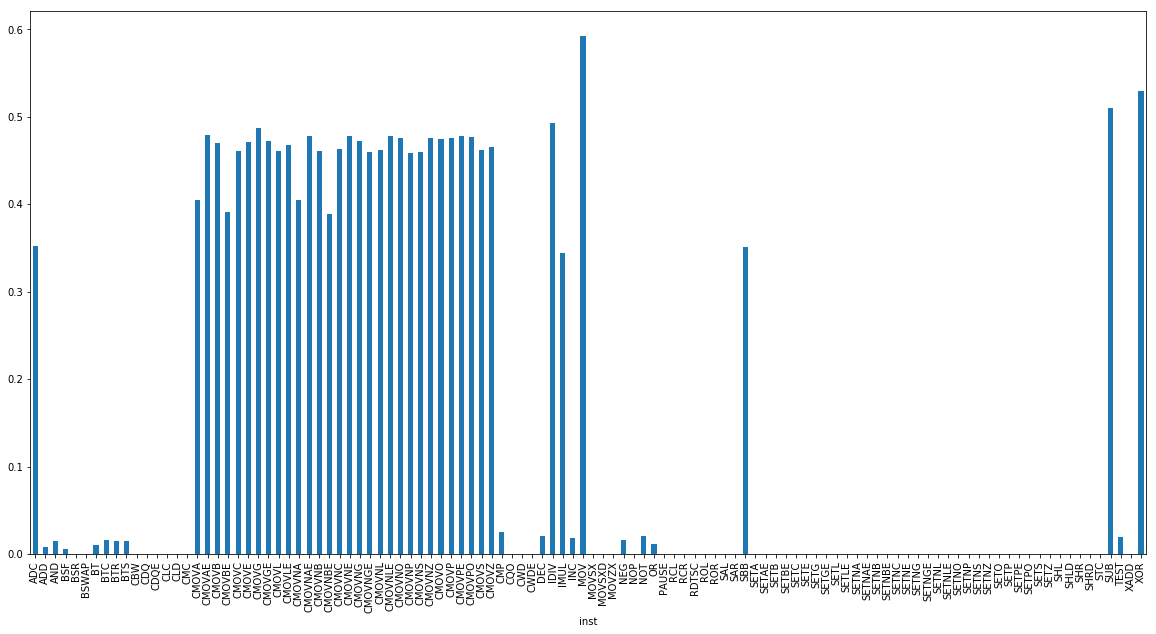

In [25]:
df[~df["args"].str.contains("peach")].groupby("inst").energy.apply(lambda x: x.std()/x.mean()).plot.bar(figsize=(20,10))

energy    0.487301
dtype: float64

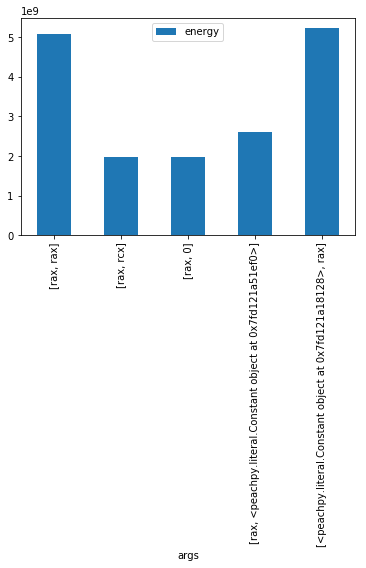

In [26]:
inst= "MOV"
df[df["inst"]==inst].plot.bar(y="energy",x="args")
df[df["inst"]==inst].std()/df[df["inst"]==inst].mean()

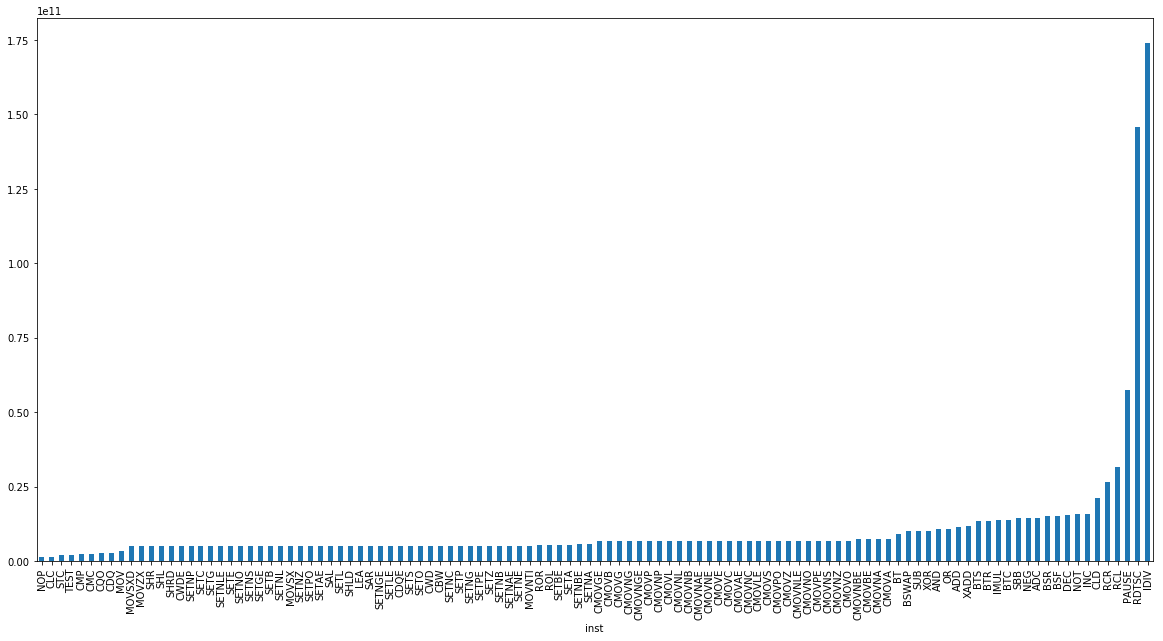

In [4]:
df.groupby("inst").energy.mean().sort_values().plot.bar(figsize=(20,10))

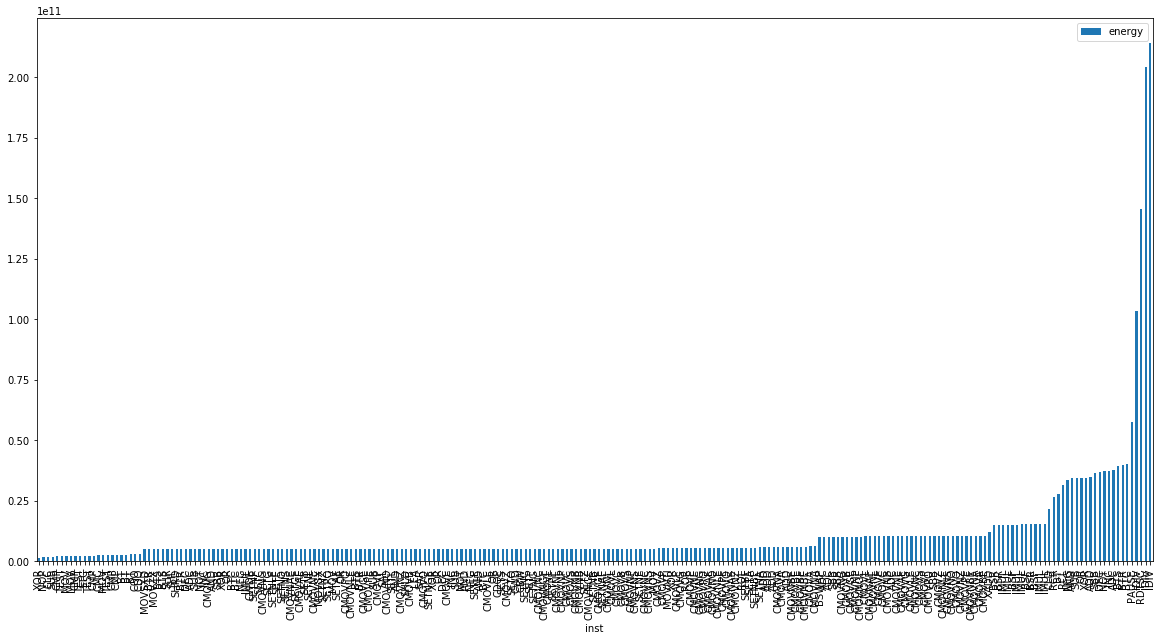

In [31]:
df.sort_values("energy").plot.bar(x="inst",y="energy", figsize=(20,10))

In [5]:
df

,inst,args,energy
0,ADD,"[rax, rax]",5694639308
1,ADD,"[rax, rcx]",5724628582
2,ADD,"[rax, 0]",5784884565
3,ADD,"[rax, <peachpy.literal.Constant object at 0x7f...",5834311816
4,ADD,[<peachpy.literal.Constant object at 0x7fd121a...,34635837166
5,SUB,"[rax, rax]",1600557329
6,SUB,"[rax, rcx]",4974564693
7,SUB,"[rax, 0]",5086755771
8,SUB,"[rax, <peachpy.literal.Constant object at 0x7f...",5126953369
9,SUB,[<peachpy.literal.Constant object at 0x7fd121a...,34191677849
